In [4]:
import numpy as np
from matplotlib import pyplot as plt

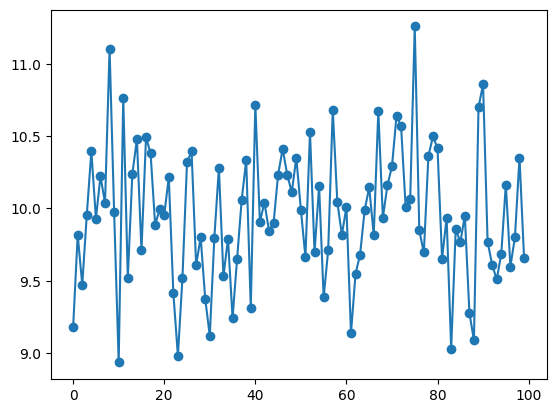

In [5]:
actual=10
nom=100
sensor=np.random.normal(actual,0.5,nom)
plt.plot(sensor,'o-')

(8.5, 11.5)

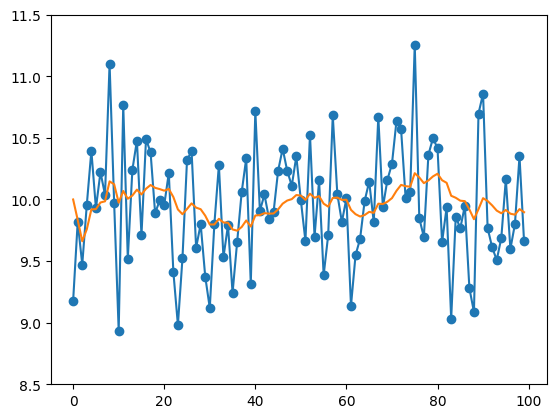

In [6]:
r=0.1 #flatness
c=.001
x=np.zeros(nom)
p=np.zeros(nom)
x_minus=np.zeros(nom)
p_minus=np.zeros(nom)
k_gain=np.zeros(nom)
x[0]=10
p[0]=1
for i in range(1,nom):
    x_minus[i]=x[i-1]
    p_minus[i]=p[i-1]+c
    k_gain[i]=p_minus[i]/(p_minus[i]+r)
    x[i]=x_minus[i]+k_gain[i]*(sensor[i]-x_minus[i])
    p[i]=(1-k_gain[i])*p_minus[i]

plt.plot(sensor,'o-')
plt.plot(x)
plt.ylim(8.5,11.5)

In [168]:
import pandas as pd
import numpy as np
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
df=df[['Track ID','TimeStamp','Type','X','Y']].dropna()
ped=[3285]
df=df[df['Track ID'].isin(ped)]
df=df.sort_values(by=['Track ID','TimeStamp'])

df.tail(30)

,Track ID,TimeStamp,Type,X,Y
207359,3285.0,1174.88,Pedestrian,778861.85,1435731.85
207360,3285.0,1175.04,Pedestrian,778861.59,1435732.29
207361,3285.0,1175.20,Pedestrian,778861.38,1435732.79
207362,3285.0,1175.36,Pedestrian,778860.98,1435733.35
207363,3285.0,1175.52,Pedestrian,778860.65,1435733.94
207364,3285.0,1175.68,Pedestrian,778860.64,1435734.52
207365,3285.0,1175.84,Pedestrian,778860.87,1435735.10
207366,3285.0,1176.00,Pedestrian,778861.14,1435735.70
207367,3285.0,1176.16,Pedestrian,778861.42,1435736.33
207368,3285.0,1176.32,Pedestrian,778861.78,1435736.97


In [169]:
df=df[['Track ID','TimeStamp','Type','X','Y']].dropna()
dt=0.16
Dx=np.zeros(len(df))
Dy=np.zeros(len(df))
dx=np.nan
dy=np.nan
i=0
while i<len(df):
    if (i==0):
        pass
    elif(df['Track ID'].iloc[i]!=df['Track ID'].iloc[i-1]):
        dx=np.nan
        dy=np.nan
    else:
        dx=df['X'].iloc[i]-df['X'].iloc[i-1]
        dy=df['Y'].iloc[i]-df['Y'].iloc[i-1]

    Dx[i]=(dx)
    Dy[i]=(dy)
    i+=1

df['dx']=Dx
df['dy']=Dy
df['vx']=df['dx']/dt
df['vy']=df['dy']/dt

In [170]:
DVx=np.zeros(len(df))
DVy=np.zeros(len(df))
dvx=np.nan
dvy=np.nan
i=0
while i<len(df):
    if (i==0):
        pass
    elif(df['Track ID'].iloc[i]!=df['Track ID'].iloc[i-1]):
        dvx=np.nan
        dvy=np.nan
    else:
        dvx=df['vx'].iloc[i]-df['vx'].iloc[i-1]
        dvy=df['vy'].iloc[i]-df['vy'].iloc[i-1]

    DVx[i]=(dvx)
    DVy[i]=(dvy)
    i+=1


df['dvx']=DVx
df['dvy']=DVy
df['ax']=df['dvx']/dt
df['ay']=df['dvy']/dt

In [171]:
df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata.csv")
df.tail(250)

,Track ID,TimeStamp,Type,X,Y,dx,dy,vx,vy,dvx,dvy,ax,ay
207353,3285.0,1173.92,Pedestrian,778870.52,1435729.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
207354,3285.0,1174.08,Pedestrian,778870.17,1435730.20,-0.35,0.35,-2.1875,2.1875,NaN,NaN,NaN,NaN
207355,3285.0,1174.24,Pedestrian,778869.39,1435730.53,-0.78,0.33,-4.8750,2.0625,-2.687500e+00,-1.250000e-01,-1.679688e+01,-7.812500e-01
207356,3285.0,1174.40,Pedestrian,778867.76,1435730.82,-1.63,0.29,-10.1875,1.8125,-5.312500e+00,-2.500000e-01,-3.320312e+01,-1.562500e+00
207357,3285.0,1174.56,Pedestrian,778865.34,1435731.11,-2.42,0.29,-15.1250,1.8125,-4.937500e+00,0.000000e+00,-3.085938e+01,0.000000e+00
207358,3285.0,1174.72,Pedestrian,778863.00,1435731.45,-2.34,0.34,-14.6250,2.1250,5.000000e-01,3.125000e-01,3.125000e+00,1.953125e+00
207359,3285.0,1174.88,Pedestrian,778861.85,1435731.85,-1.15,0.40,-7.1875,2.5000,7.437500e+00,3.750000e-01,4.648437e+01,2.343750e+00
207360,3285.0,1175.04,Pedestrian,778861.59,1435732.29,-0.26,0.44,-1.6250,2.7500,5.562500e+00,2.500000e-01,3.476563e+01,1.562500e+00
207361,3285.0,1175.20,Pedestrian,778861.38,1435732.79,-0.21,0.50,-1.3125,3.1250,3.125000e-01,3.750000e-01,1.953125e+00,2.343750e+00
207362,3285.0,1175.36,Pedestrian,778860.98,1435733.35,-0.40,0.56,-2.5000,3.5000,-1.187500e+00,3.750000e-01,-7.421875e+00,2.343750e+00


# Test of Velosity smoothening


In [ ]:
df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata.csv")
actual=3
nom=len(df)
sensor=df['vx']
r=0.005 #flatness
c=.01
x=np.zeros(nom)
p=np.zeros(nom)
x_minus=np.zeros(nom)
p_minus=np.zeros(nom)
k_gain=np.zeros(nom)
x[0]=df['vx'].iloc[1]
p[0]=1
for i in range(1,nom):
    x_minus[i]=x[i-1]
    p_minus[i]=p[i-1]+c
    k_gain[i]=p_minus[i]/(p_minus[i]+r)
    x[i]=x_minus[i]+k_gain[i]*(sensor[i]-x_minus[i])
    p[i]=(1-k_gain[i])*p_minus[i]

# plt.plot(sensor,'o-')
# plt.plot(x)
df['vx_smooth']=x
df['dx_smooth']=dt*df['vx_smooth']
df['x_smooth']=0
for i in range(len(df)):
    if i==0:
        df['x_smooth'].iloc[i]=df['X'].iloc[i]


    else:
        df['x_smooth'].iloc[i]=df['x_smooth'].iloc[i-1]+df['dx_smooth'].iloc[i]
# plt.ylim(8.5,11.5)



C:\Users\Tusha\AppData\Local\Temp\ipykernel_30096\641061611.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['x_smooth'].iloc[i]=df['X'].iloc[i]


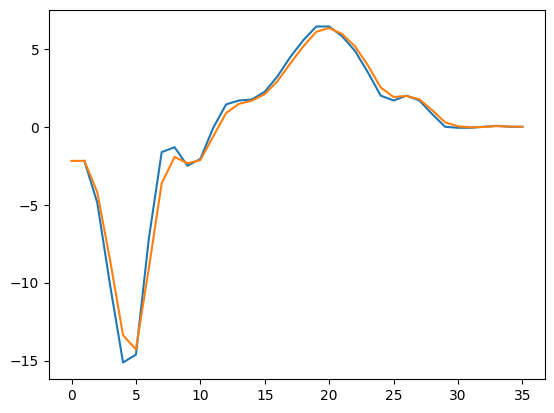

In [210]:
plt.plot(sensor)
plt.plot(df['vx_smooth'])

In [211]:
nom=len(df)
sensor=df['vy']
x=np.zeros(nom)
p=np.zeros(nom)
x_minus=np.zeros(nom)
p_minus=np.zeros(nom)
k_gain=np.zeros(nom)
x[0]=df['vy'].iloc[1]
p[0]=1
for i in range(1,nom):
    x_minus[i]=x[i-1]
    p_minus[i]=p[i-1]+c
    k_gain[i]=p_minus[i]/(p_minus[i]+r)
    x[i]=x_minus[i]+k_gain[i]*(sensor[i]-x_minus[i])
    p[i]=(1-k_gain[i])*p_minus[i]

# plt.plot(sensor,'o-')
# plt.plot(x)
df['vy_smooth']=x
df['dy_smooth']=dt*df['vy_smooth']
df['y_smooth']=0
for i in range(len(df)):
    if i==0:
        df['y_smooth'].iloc[i]=df['Y'].iloc[i]

    else:
        df['y_smooth'].iloc[i]=df['y_smooth'].iloc[i-1]+df['dy_smooth'].iloc[i]
# plt.ylim(8.5,11.5)

df.head()

C:\Users\Tusha\AppData\Local\Temp\ipykernel_30096\2725250746.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['y_smooth'].iloc[i]=df['Y'].iloc[i]


,Unnamed: 0,Track ID,TimeStamp,Type,X,Y,dx,dy,vx,vy,dvx,dvy,ax,ay,vx_smooth,dx_smooth,x_smooth,vy_smooth,dy_smooth,y_smooth
0,207353,3285.0,1173.92,Pedestrian,778870.52,1435729.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-2.187500,-0.350000,778870.520000,2.187500,0.350000,1.435730e+06
1,207354,3285.0,1174.08,Pedestrian,778870.17,1435730.20,-0.35,0.35,-2.1875,2.1875,NaN,NaN,NaN,NaN,-2.187500,-0.350000,778870.170000,2.187500,0.350000,1.435730e+06
2,207355,3285.0,1174.24,Pedestrian,778869.39,1435730.53,-0.78,0.33,-4.8750,2.0625,-2.6875,-0.125,-16.796875,-0.78125,-4.202297,-0.672367,778869.497633,2.093789,0.335006,1.435731e+06
3,207356,3285.0,1174.40,Pedestrian,778867.76,1435730.82,-1.63,0.29,-10.1875,1.8125,-5.3125,-0.250,-33.203125,-1.56250,-8.591315,-1.374610,778868.123022,1.887516,0.302003,1.435731e+06
4,207357,3285.0,1174.56,Pedestrian,778865.34,1435731.11,-2.42,0.29,-15.1250,1.8125,-4.9375,0.000,-30.859375,0.00000,-13.374895,-2.139983,778865.983039,1.832594,0.293215,1.435731e+06


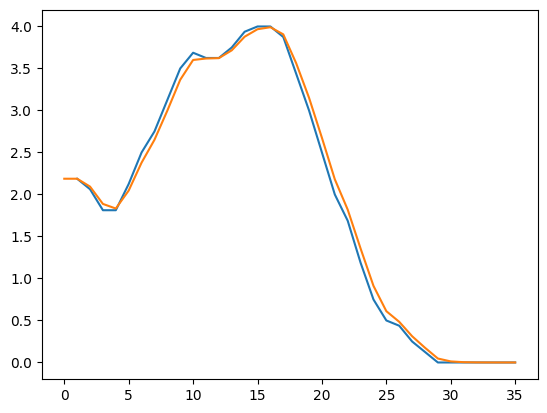

In [207]:
plt.plot(sensor)
plt.plot(df['vy_smooth'])

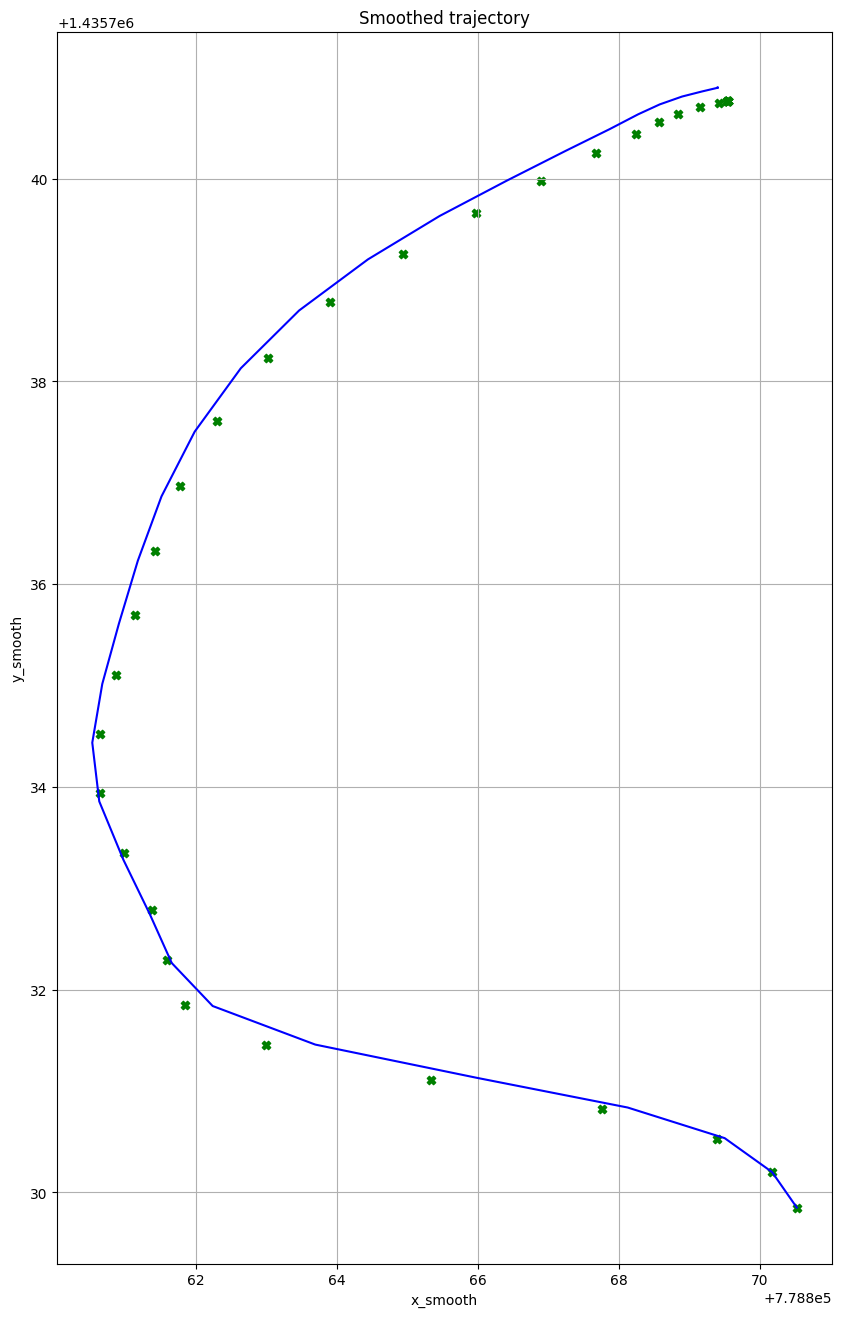

In [208]:
plt.figure(figsize=(10,16))
plt.plot(df['x_smooth'], df['y_smooth'],color='blue',)
plt.xlabel("x_smooth")
plt.ylabel("y_smooth")
plt.title("Smoothed trajectory")
plt.grid(True)
plt.scatter(df['X'],df['Y'],color='green',marker='X')
plt.show()

In [202]:
def dist(a,b,c,d):
        return ((a-c)**2 +(b-d)**2)**0.5

df['dev']=dist(df['X'],df['Y'],df['x_smooth'], df['y_smooth'])
total=df['dev']
close= df[df['dev']<0.3]
len(close)
print (f' % retained = {round(len(close)*100/len(total),2)}')


 % retained = 8.33


In [15]:
# df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/dummydata.csv")


# Kalman filter on Trijectory Data

       Track ID  TimeStamp         Type          X           Y
61365    1110.0     377.44   Pedestrian  778891.66  1435736.67
61366    1110.0     377.60   Pedestrian  778891.49  1435736.64
61367    1110.0     377.76   Pedestrian  778891.42  1435736.57
61368    1110.0     377.92   Pedestrian  778891.61  1435736.43
61369    1110.0     378.08   Pedestrian  778891.98  1435736.26


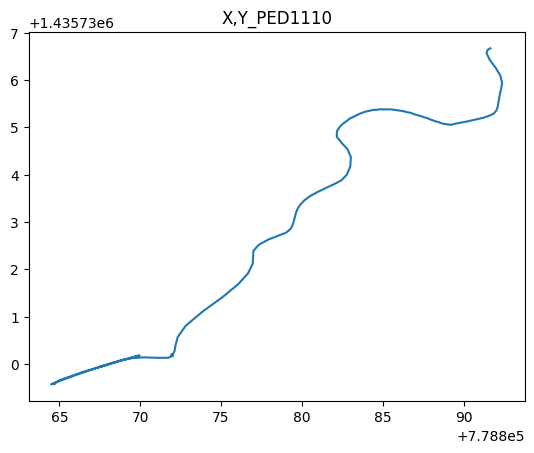

In [16]:
from  matplotlib import pyplot as plt

df=pd.read_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\dataset\Majestic.csv")
df=df[['Track ID','TimeStamp','Type','X','Y']].dropna()
# df.tail(30)
ped=[1110]
df=df[df['Track ID'].isin(ped)]
df=df.sort_values(by=['Track ID','TimeStamp'])
print(df.head())
plt.plot(df['X'],df['Y'])
plt.title(f'X,Y_PED{ped[0]}')
plt.show()

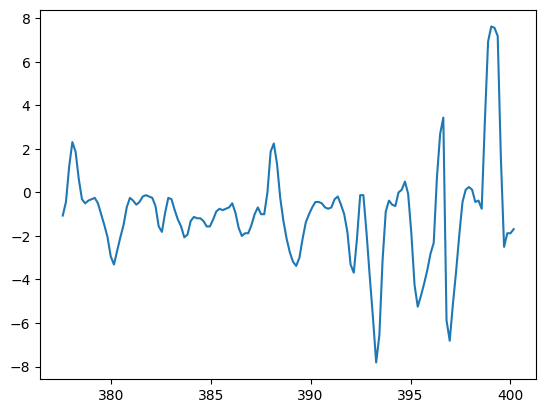

In [17]:
df=df[['Track ID','TimeStamp','Type','X','Y']].dropna()
dt=0.16
Dx=np.zeros(len(df))
Dy=np.zeros(len(df))
dx=np.nan
dy=np.nan
i=0
while i<len(df):
    if (i==0):
        pass
    elif(df['Track ID'].iloc[i]!=df['Track ID'].iloc[i-1]):
        dx=np.nan
        dy=np.nan
    else:
        dx=df['X'].iloc[i]-df['X'].iloc[i-1]
        dy=df['Y'].iloc[i]-df['Y'].iloc[i-1]

    Dx[i]=(dx)
    Dy[i]=(dy)
    i+=1

df['dx']=Dx
df['dy']=Dy
df['vx']=df['dx']/dt
df['vy']=df['dy']/dt
plt.plot(df['TimeStamp'],df['vx'])


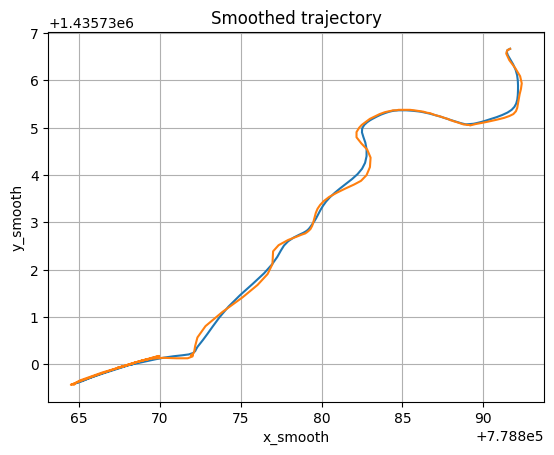

In [18]:
def kalman_1d(sensor, r=0.01, c=0.001):
    n = len(sensor)
    x = np.zeros(n)
    p = np.zeros(n)
    x_minus = np.zeros(n)
    p_minus = np.zeros(n)
    k_gain = np.zeros(n)

    x[0] = sensor[0]
    p[0] = 1

    for i in range(1, n):
        x_minus[i] = x[i-1]
        p_minus[i] = p[i-1] + c
        k_gain[i] = p_minus[i] / (p_minus[i] + r)
        x[i] = x_minus[i] + k_gain[i] * (sensor[i] - x_minus[i])
        p[i] = (1 - k_gain[i]) * p_minus[i]
    
    return x

# Apply Kalman filter
df['x_smooth'] = kalman_1d(df['X'].values)
df['y_smooth'] = kalman_1d(df['Y'].values)

# Plot
plt.plot(df['x_smooth'], df['y_smooth'])
plt.xlabel("x_smooth")
plt.ylabel("y_smooth")
plt.title("Smoothed trajectory")
plt.grid(True)
plt.plot(df['X'],df['Y'])
plt.show()


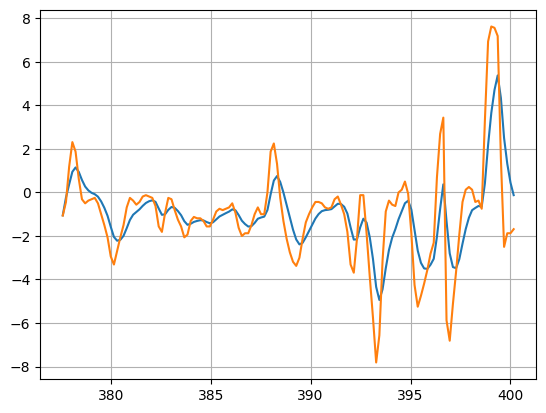

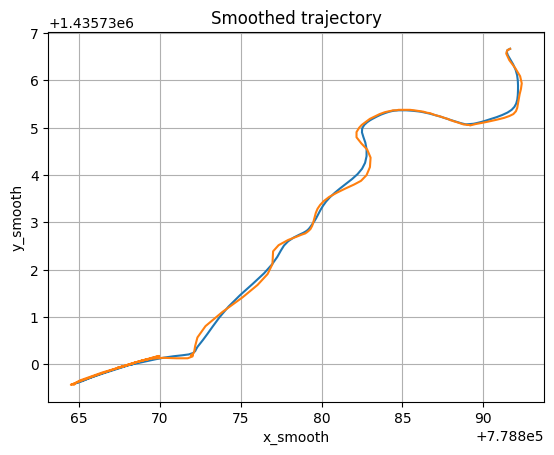

In [19]:
dt=0.16
Dx=np.zeros(len(df))
Dy=np.zeros(len(df))
dx=np.nan
dy=np.nan
i=0
while i<len(df):
    if (i==0):
        pass
    elif(df['Track ID'].iloc[i]!=df['Track ID'].iloc[i-1]):
        dx=np.nan
        dy=np.nan
    else:
        dx=df['x_smooth'].iloc[i]-df['x_smooth'].iloc[i-1]
        dy=df['y_smooth'].iloc[i]-df['y_smooth'].iloc[i-1]

    Dx[i]=(dx)
    Dy[i]=(dy)
    i+=1

df['dx_smooth']=Dx
df['dy_smooth']=Dy
df['vx_afterSmooth']=df['dx_smooth']/dt
df['vy_afterSmooth']=df['dy_smooth']/dt
plt.plot(df['TimeStamp'],df['vx_afterSmooth'])
plt.plot(df['TimeStamp'],df['vx'])
plt.grid(True)
plt.show()
# Plot2
plt.plot(df['x_smooth'], df['y_smooth'])
plt.xlabel("x_smooth")
plt.ylabel("y_smooth")
plt.title("Smoothed trajectory")
plt.grid(True)
plt.plot(df['X'],df['Y'])
plt.show()

In [20]:
# df.to_csv(r"C:\Users\Tusha\Visual Studio Codes\test_codeEVT\Temp/PED1110.csv")

In [21]:
# Initialize arrays
n = len(df)
state = np.zeros((4, n))  # [x, vx, y, vy]

# Measurement noise
r_pos = 1e-2   # noise in position
r_vel = 1e-1   # noise in velocity (optional, if available)

# Process noise
q = 1e-1

# Matrices
F = np.array([[1, dt, 0,  0],
              [0,  1, 0,  0],
              [0,  0, 1, dt],
              [0,  0, 0,  1]])  # State transition

H = np.array([[1, 0, 0, 0],
              [0, 0, 1, 0]])    # We observe only x and y

R = np.array([[r_pos, 0],
              [0, r_pos]])      # Measurement noise

Q = q * np.eye(4)              # Process noise

P = np.eye(4)                  # Initial covariance

# Initial state from first measurement
state[:, 0] = [df['X'].iloc[0], 0, df['Y'].iloc[0], 0]


In [22]:
for i in range(1, n):
    # Predict
    state_pred = F @ state[:, i-1]
    P_pred = F @ P @ F.T + Q

    # Measurement
    z = np.array([df['X'].iloc[i], df['Y'].iloc[i]])

    # Kalman gain
    S = H @ P_pred @ H.T + R
    K = P_pred @ H.T @ np.linalg.inv(S)

    # Update
    y = z - H @ state_pred
    state[:, i] = state_pred + K @ y
    P = (np.eye(4) - K @ H) @ P_pred


In [23]:
df['x_smooth'] = state[0]
df['vx_smooth'] = state[1]
df['y_smooth'] = state[2]
df['vy_smooth'] = state[3]


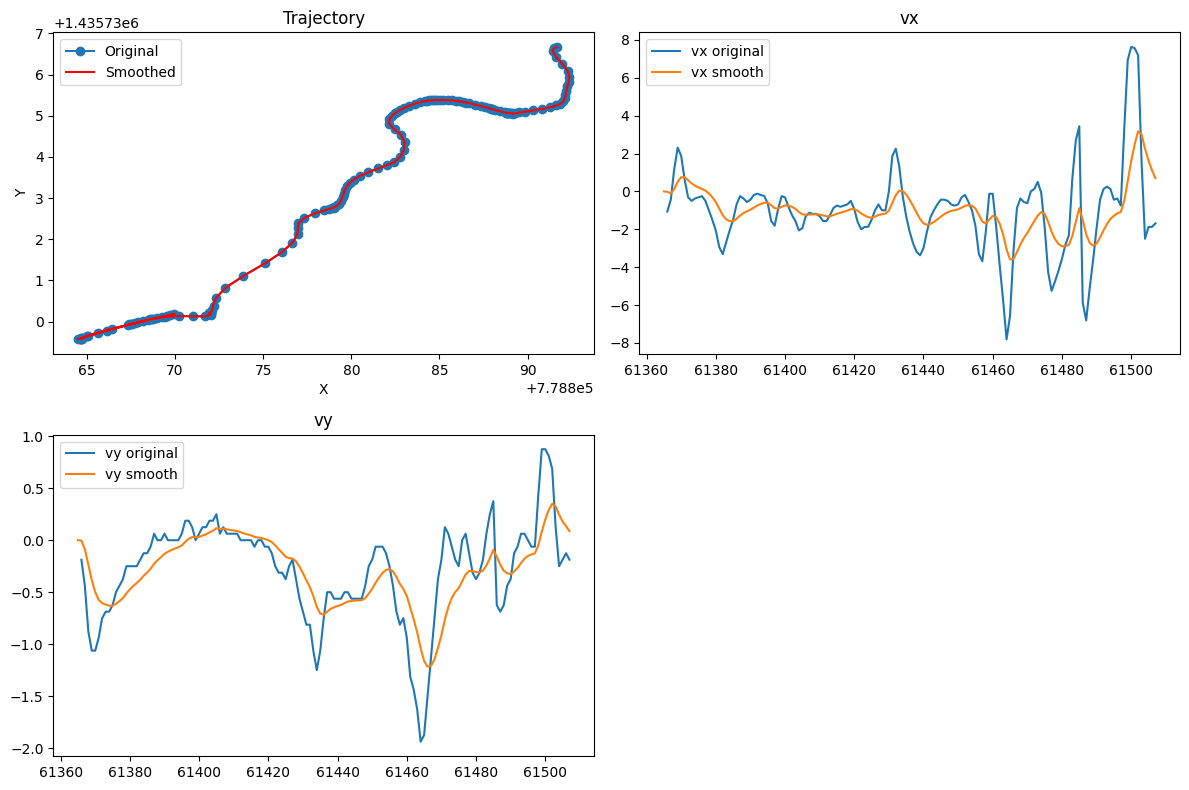

In [24]:
plt.figure(figsize=(12, 8))

# Position
plt.subplot(2, 2, 1)
plt.plot(df['X'], df['Y'], 'o-', label='Original')
plt.plot(df['x_smooth'], df['y_smooth'], 'r-', label='Smoothed')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Trajectory')
plt.legend()

# vx
plt.subplot(2, 2, 2)
plt.plot(df['vx'], label='vx original')
plt.plot(df['vx_smooth'], label='vx smooth')
plt.title('vx')
plt.legend()

# vy
plt.subplot(2, 2, 3)
plt.plot(df['vy'], label='vy original')
plt.plot(df['vy_smooth'], label='vy smooth')
plt.title('vy')
plt.legend()

plt.tight_layout()
plt.show()
